# TP Physique - Équation de la chaleur
## Exercice 2

Eq en régime permanent

d2T / dx2 = 0

T(x =0) = T0

T(x = 1) = T1

T(i)i E [0, N+1]

x(i+1) - x(i) = deltaX = 1/N

d2T/dx2 = (T(i-1) - 2*T(i) + T(i+1))/deltaX**2

### Question 1: Résoudre cette équation pour les conditions aux bord
$$
d2T / dx2 => dT / dx = A => T(x) = Ax + b
$$

Ici b = T0 d'où $$T(x) = Ax + T0$$

$$
T1 - T0 / 1 - 0 = A = T1 - T0 donc T(x) = (T1 - T0)x + T0
$$
### Question 2: Ecrire l'équation de la chaleur discrétisée pour i E [1, N-2], puis pour i = 0 et i = N
$$d2T/dx2 = 0$$

$$T(i+1) - 2*T(i) + T(i-1) = 0$$

Pour i = 0: $$T(i-1) = ? => CB = T0-$$

$$
-2T0 + T(1) = -T0-
$$

Pour i = N: $$T(N+2) = T1+$$

$$
T(N) - 2T(N+1) = -T1+
$$

Système linéaire
$$
\begin{cases}
-2T_0 + T_1 = -T_0 \\
T_0 - 2T_1 + T_2 = 0 \\
T_1 - 2T_2 + T_3 = 0 \\
\vdots \\
T_{N-1} - 2T_N + T_{N+1} = 0 \\
T_N - 2T_{N+1} = -T_1
\end{cases}
$$

=> MT = b

### Question 3: Montrer que l'équation discrétisée peut s'écrire: MT = b, avc M une matrice de taille N X N et b un vecteur de taille N. On précisera les termes non nuls de M et b.
Matrice du système (simplifiée pour N=6, normalement N indéfini)
$$
\begin{bmatrix}
-2 & 1 & 0 & 0 & 0 & 0 & 0\\
1 & -2 & 1 & 0 & 0 & 0 & 0\\
0 & 1 & -2 & 1 & 0 & 0 & 0\\
0 & 0 & 1 & -2 & 1 & 0 & 0\\
0 & 0 & 0 & 1 & -2 & 1 & 0\\
0 & 0 & 0 & 0 & 1 & -2 & 1\\
0 & 0 & 0 & 0 & 0 & 1 & -2\\
\end{bmatrix}
\begin{bmatrix}
T0\\
T1\\
T2\\
T3\\
T4\\
T5\\
T
\end{bmatrix}
=
\begin{bmatrix}
-T0\\
0\\
0\\
0\\
0\\
0\\
-T1+
\end{bmatrix}
$$

### Question 4: Sous python, construire la matrice M et le vecteur b à l'aide de numpy. Résoudre ensuite le système linéaire à l'aide de la fonction numpy.linalg.solve(M, b).


Matrice M: [[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]
Matrice b: [ -2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. -25.]
Solution T: [ 2.2254902   2.45098039  2.67647059  2.90196078  3.12745098  3.35294118
  3.57843137  3.80392157  4.02941176  4.25490196  4.48039216  4.70588235
  4.93137255  5.15686275  5.38235294  5.60784314  5.83333333  6.05882353
  6.28431373  6.50980392  6.73529412  6.9

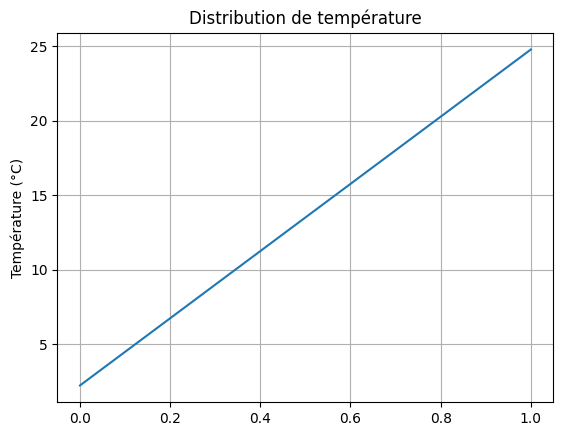

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes et paramètres
N = 100

M = np.zeros((N + 1, N + 1))

b = np.zeros(N + 1)

# Conditions aux bords
T0 = 2
T1 = 25

# Remplissage de la matrice M
for i in range(N + 1):
    if i == 0:
        M[i, i] = -2
        M[i, i + 1] = 1
    elif i == N:
        M[i, i - 1] = 1
        M[i, i] = -2
    else:
        M[i, i - 1] = 1
        M[i, i] = -2
        M[i, i + 1] = 1

# Affichage de la matrice M
print(f"Matrice M: {M}")

# Remplissage du vecteur b
b[0] = -T0
b[N] = -T1

# Affichage du vecteur b
print(f"Matrice b: {b}")

# Résolution du système linéaire
T = np.linalg.solve(M, b)

# Affichage de la solution
print(f"Solution T: {T}")

# Tracé de la solution
plt.plot(np.linspace(0, 1, N + 1), T)
plt.ylabel("Température (°C)")
plt.title("Distribution de température")
plt.grid()
plt.show()